In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

In [2]:
train_dataset, val_dataset = keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both'
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Using 14059 files for validation.


In [3]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
)

class_names = train_dataset.class_names
train_batches = len(train_dataset)

def get_dataset_size(dataset):
    num_batches = len(dataset)
    return num_batches * 32

print(f"\nTotal number of samples in train_dataset: {get_dataset_size(train_dataset)} ({len(train_dataset)} batches of 32)")
print(f"Total number of samples in validation_dataset: {get_dataset_size(val_dataset)} ({len(val_dataset)} batches of 32)")
print(f"Total number of samples in test_dataset: {get_dataset_size(test_dataset)} ({len(test_dataset)} batches of 32)")

Found 17572 files belonging to 38 classes.

Total number of samples in train_dataset: 56256 (1758 batches of 32)
Total number of samples in validation_dataset: 14080 (440 batches of 32)
Total number of samples in test_dataset: 17600 (550 batches of 32)


In [4]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

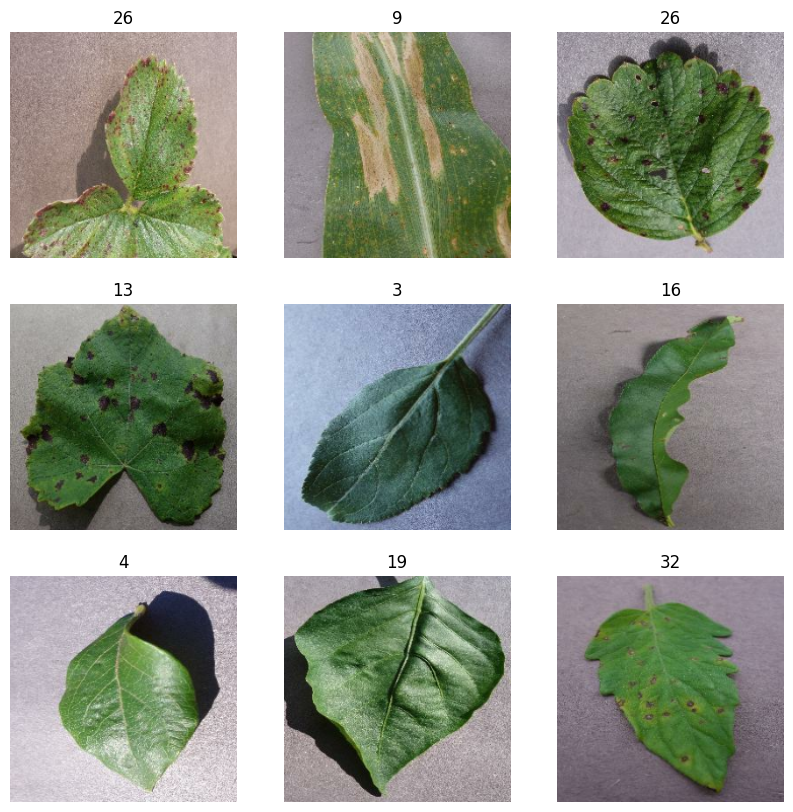

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
def make_alexnet_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Layer 1: Convolutional + Max Pooling
#     x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, (3, 3), strides=(4, 4), activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2,2))(x)
    x = layers.BatchNormalization()(x)

    # Layer 2: Convolutional + Max Pooling
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2,2))(x)
    x = layers.BatchNormalization()(x)

    # Layer 3: Three Convolutional Layers
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Layer 4: Max Pooling
    x = layers.MaxPooling2D((3, 3), strides=(2,2))(x)

    # Flatten and Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return keras.Model(inputs, outputs)

In [8]:
def make_vgg16_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Block 1
   # x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 2
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 3
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 4
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 5
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Flatten and Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs, outputs)

In [9]:
def make_vgg19_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Block 1
   # x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 2
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)


    # Block 3
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Flatten and Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs, outputs)

In [10]:
from tqdm import tqdm
num_epochs = 5
num_classes = 38
image_size = (224, 224, 3)

models = {
    "AlexNet": make_alexnet_model(input_shape=image_size, num_classes=num_classes),
    "VGG16": make_vgg16_model(input_shape=image_size, num_classes=num_classes),
    "VGG19": make_vgg19_model(input_shape=image_size, num_classes=num_classes),
}

model_histories = {}

for name, model in models.items():
    print(f'\x1b[34mTraining {name} Model...\x1b[0m')
    model.compile(
        optimizer=keras.optimizers.Adam(1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    start = time.time()
        
    # Wrap model.fit with tqdm for a progress bar
    progress_bar = tqdm(total=num_epochs, position=0, leave=True)
    history = model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=val_dataset,
        verbose=1,
        callbacks=[
            tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: progress_bar.update(1)),
        ]
    )
    progress_bar.close()
    
    model_histories[name] = history
    
    end = time.time()
    print(f'Finished training {name} in {end-start:.2f}s\n')

Training AlexNet Model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
   5/1758 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.0434 - loss: 3.7368 

I0000 00:00:1714887359.487548     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4837 - loss: 1.8018

 20%|██        | 1/5 [02:13<08:55, 133.79s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 134s 70ms/step - accuracy: 0.4838 - loss: 1.8014 - val_accuracy: 0.8775 - val_loss: 0.3868
Epoch 2/5
1756/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8565 - loss: 0.4536

 40%|████      | 2/5 [03:02<04:10, 83.55s/it] 

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.8565 - loss: 0.4535 - val_accuracy: 0.9165 - val_loss: 0.2636
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9102 - loss: 0.2716

 60%|██████    | 3/5 [03:49<02:13, 66.99s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9102 - loss: 0.2716 - val_accuracy: 0.9269 - val_loss: 0.2307
Epoch 4/5
1757/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9333 - loss: 0.2005

 80%|████████  | 4/5 [04:37<00:59, 59.45s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.9333 - loss: 0.2005 - val_accuracy: 0.9541 - val_loss: 0.1419
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9531 - loss: 0.1447

100%|██████████| 5/5 [05:26<00:00, 55.82s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9531 - loss: 0.1447 - val_accuracy: 0.9528 - val_loss: 0.1499


100%|██████████| 5/5 [05:26<00:00, 65.35s/it]


Finished training AlexNet in 326.76s

Training VGG16 Model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4560 - loss: 2.1918

 20%|██        | 1/5 [06:20<25:22, 380.73s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 381s 193ms/step - accuracy: 0.4561 - loss: 2.1913 - val_accuracy: 0.8585 - val_loss: 0.4525
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8273 - loss: 0.5564

 40%|████      | 2/5 [11:34<17:03, 341.14s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 313s 178ms/step - accuracy: 0.8274 - loss: 0.5563 - val_accuracy: 0.9207 - val_loss: 0.2495
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8872 - loss: 0.3651

 60%|██████    | 3/5 [16:47<10:56, 328.40s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 313s 178ms/step - accuracy: 0.8872 - loss: 0.3651 - val_accuracy: 0.9004 - val_loss: 0.3175
Epoch 4/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9187 - loss: 0.2623

 80%|████████  | 4/5 [22:00<05:22, 322.27s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 313s 178ms/step - accuracy: 0.9187 - loss: 0.2622 - val_accuracy: 0.9344 - val_loss: 0.2081
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9398 - loss: 0.1958

100%|██████████| 5/5 [27:13<00:00, 318.89s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 313s 178ms/step - accuracy: 0.9398 - loss: 0.1958 - val_accuracy: 0.9513 - val_loss: 0.1530


100%|██████████| 5/5 [27:13<00:00, 326.63s/it]


Finished training VGG16 in 1633.17s

Training VGG19 Model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4391 - loss: 2.2448

 20%|██        | 1/5 [06:13<24:55, 373.99s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 374s 202ms/step - accuracy: 0.4392 - loss: 2.2443 - val_accuracy: 0.7131 - val_loss: 0.9556
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8174 - loss: 0.6002

 40%|████      | 2/5 [11:56<17:46, 355.66s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 343s 195ms/step - accuracy: 0.8174 - loss: 0.6002 - val_accuracy: 0.8929 - val_loss: 0.3493
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8773 - loss: 0.3882

 60%|██████    | 3/5 [17:39<11:39, 349.54s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 342s 195ms/step - accuracy: 0.8773 - loss: 0.3882 - val_accuracy: 0.9007 - val_loss: 0.3306
Epoch 4/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9081 - loss: 0.2957

 80%|████████  | 4/5 [23:21<05:46, 346.64s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 342s 195ms/step - accuracy: 0.9081 - loss: 0.2956 - val_accuracy: 0.8985 - val_loss: 0.3465
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9317 - loss: 0.2266

100%|██████████| 5/5 [29:03<00:00, 344.99s/it]

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 342s 194ms/step - accuracy: 0.9317 - loss: 0.2266 - val_accuracy: 0.9310 - val_loss: 0.2318


100%|██████████| 5/5 [29:03<00:00, 348.67s/it]

Finished training VGG19 in 1743.36s



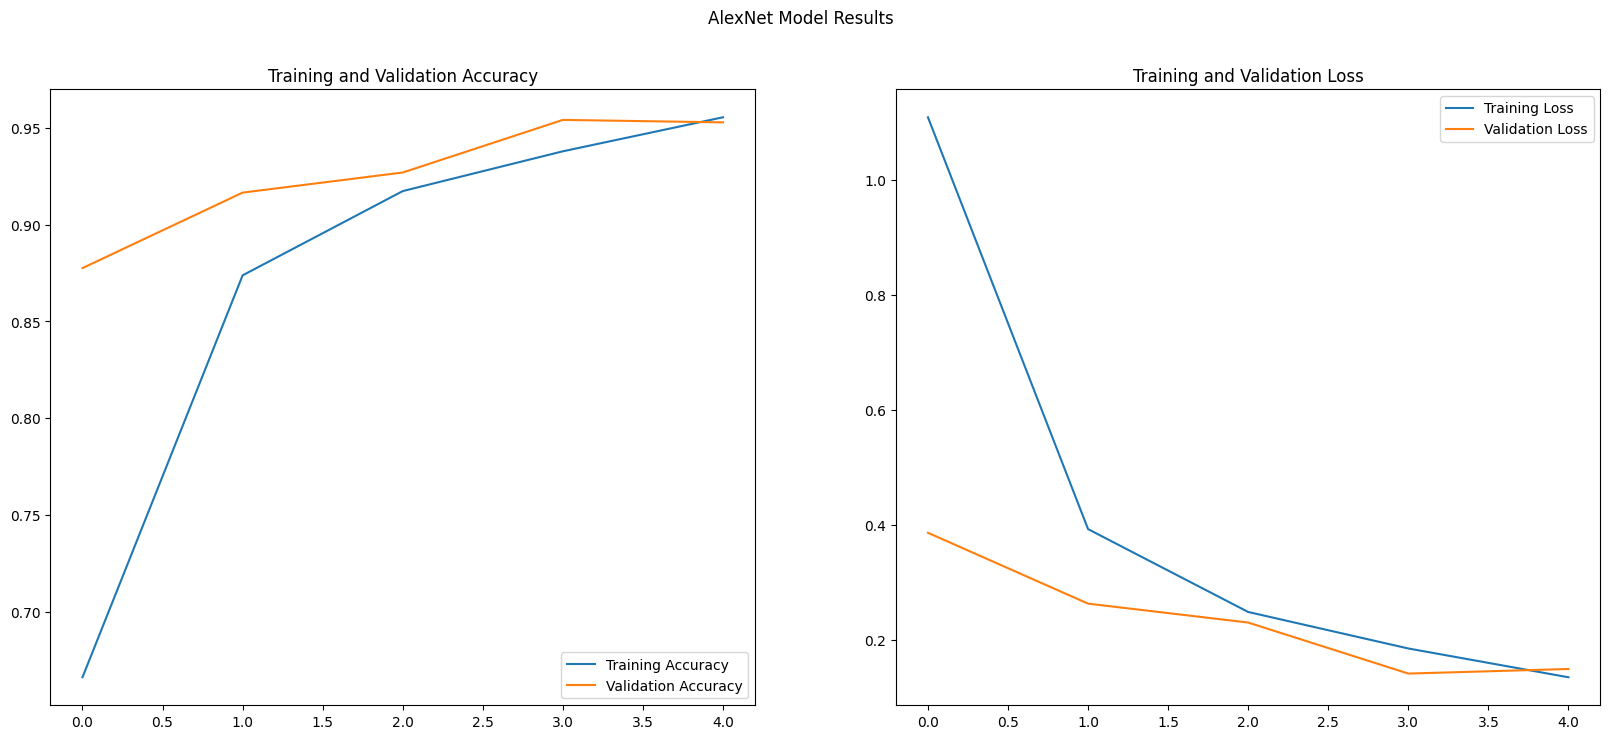

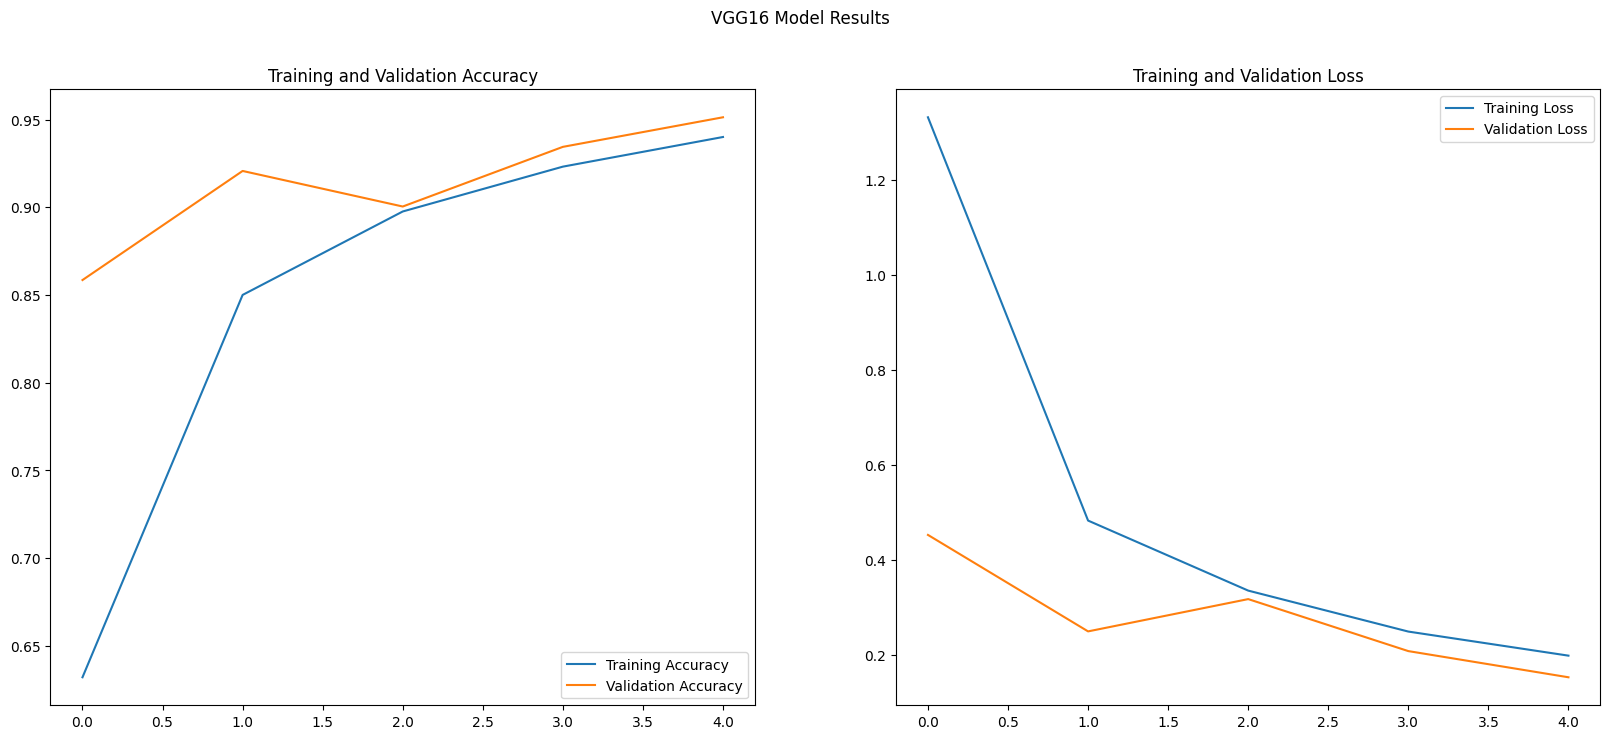

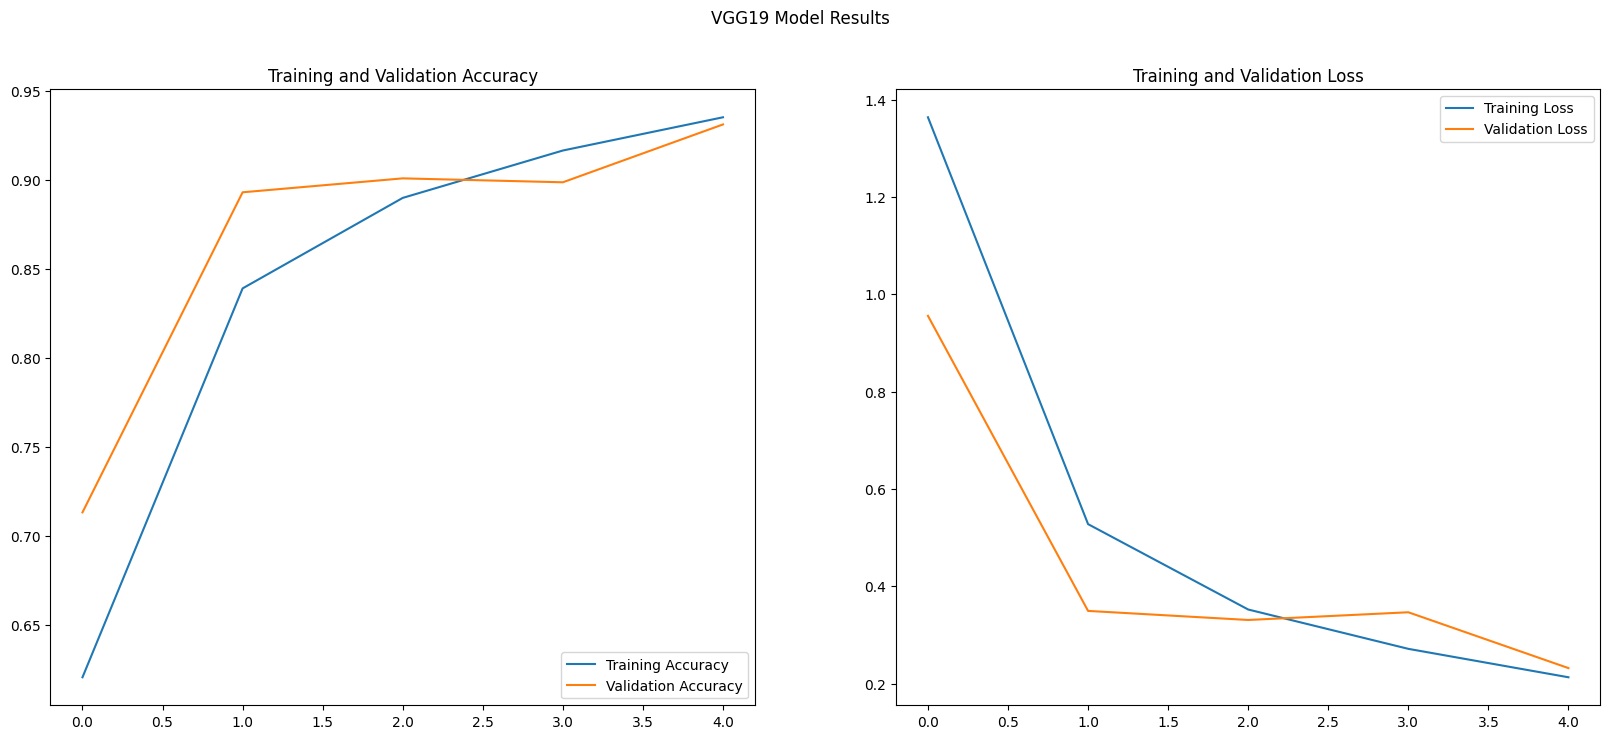

In [11]:
def plot_model_performance(name, history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(num_epochs)

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.suptitle(f'{name} Model Results')
    plt.show()

for name, history in model_histories.items():
    plot_model_performance(name, history)

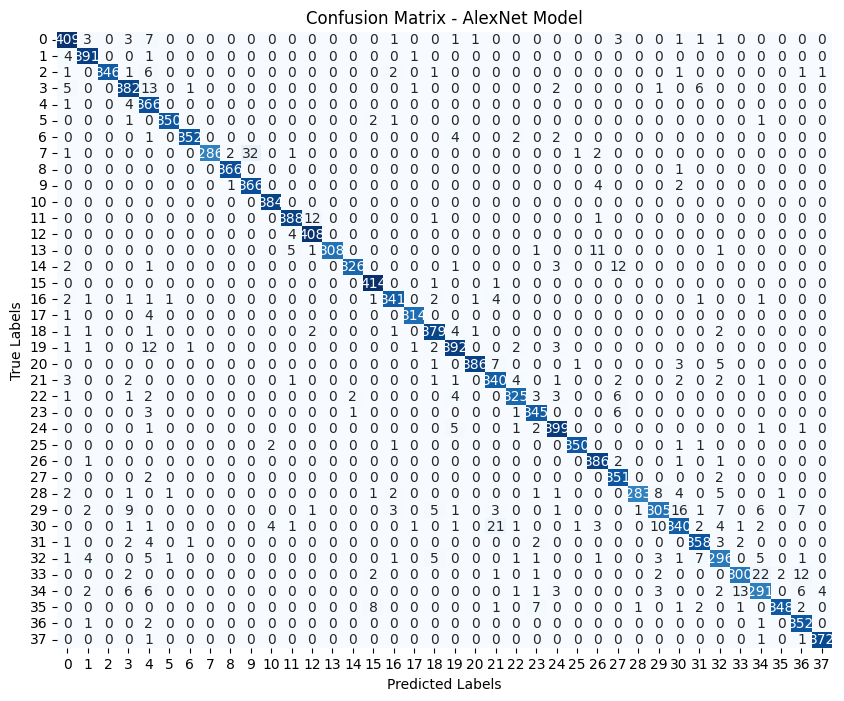

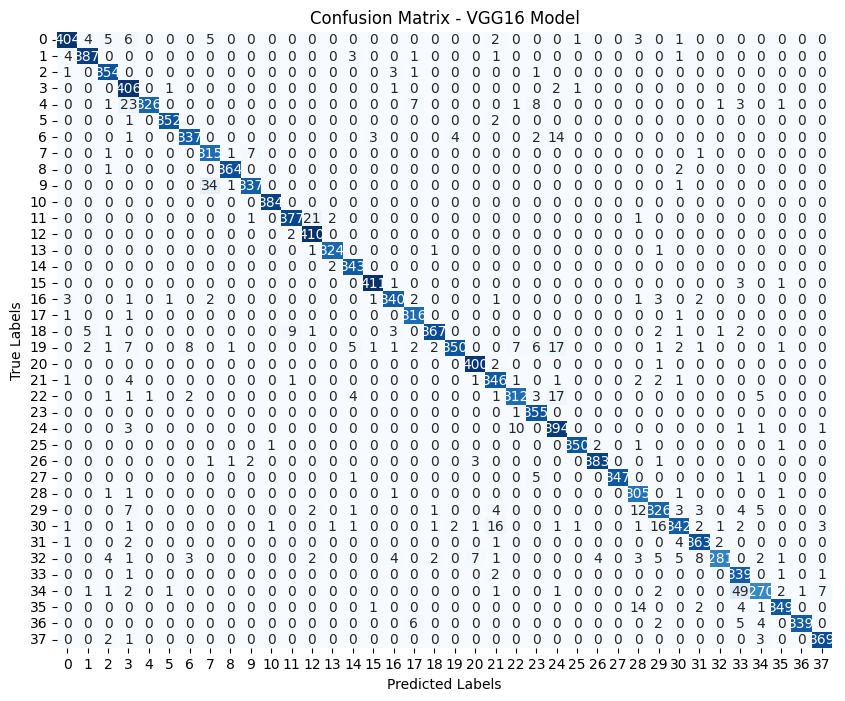

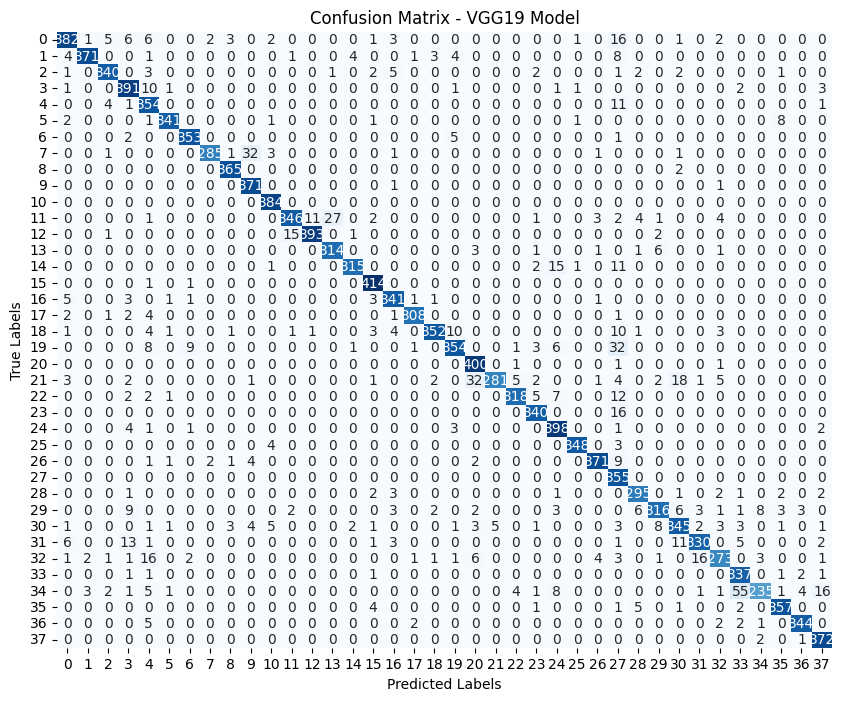

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(name, model, val_dataset):
    true_labels = []
    predicted_labels = []
    for images, labels in val_dataset:
        true_labels.extend(labels.numpy())
        predictions = np.argmax(model.predict(images, verbose = 0), axis=1)
        predicted_labels.extend(predictions)

    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name} Model')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

for name, model in models.items():
    plot_confusion_matrix(name, model, val_dataset)


In [13]:
model_results = {}

for name, model in models.items():
    model_results[name] = model.evaluate(test_dataset)

    print(f'\x1b[34m{name} Model Results:\x1b[0m')
    print(f"Test accuracy: {model_results[name][1]*100:.2f}%")
    print(f"Test loss: {model_results[name][0]:.4f}", end = '\n\n')

550/550 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.9471 - loss: 0.1624
AlexNet Model Results:
Test accuracy: 94.50%
Test loss: 0.1673

550/550 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9496 - loss: 0.1558
VGG16 Model Results:
Test accuracy: 94.73%
Test loss: 0.1632

550/550 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9257 - loss: 0.2413
VGG19 Model Results:
Test accuracy: 92.67%
Test loss: 0.2413



In [16]:
for name, model in models.items():
    model.save(f'/kaggle/working/{name}-{model_results[name][1]*100:.2f}%.keras')
    print(f'Saved {name} Model')
    

Saved AlexNet Model
Saved VGG16 Model
Saved VGG19 Model


## Testing

In [3]:
alexnet_model = keras.models.load_model('Saved Models/AlexNet-93.32%.keras')
vgg16_model = keras.models.load_model('Saved Models/VGG16-94.73%.keras')
vgg19_model = keras.models.load_model('Saved Models/VGG19-92.67%.keras')

AlexNet Predicted Class: Pepper,_bell___healthy
VGG16 Predicted Class: Potato___healthy
VGG19 Predicted Class: Potato___healthy


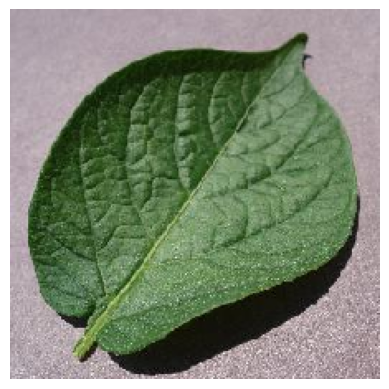

In [20]:
class_to_test = 3 # Enter number from 0 to 37
img_to_test = 100

#img = keras.utils.load_img(
#    f'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/{class_names[class_to_test]}' + '/' + os.listdir(f'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/{class_names[class_to_test]}')[img_to_test],    
#    target_size=(224, 224)
#)
img2 = keras.utils.load_img(
    f'test/test/PotatoHealthy2.JPG', target_size=(224,224)
)
plt.imshow(img2)
plt.axis('off')



img_array = keras.utils.img_to_array(img2)
img_array = tf.expand_dims(img_array, 0)

prediction = tf.argmax(alexnet_model.predict(img_array, verbose=0)[0]).numpy()
print(f'AlexNet Predicted Class: {class_names[prediction]}')
prediction = tf.argmax(vgg16_model.predict(img_array, verbose=0)[0]).numpy()
print(f'VGG16 Predicted Class: {class_names[prediction]}')
prediction = tf.argmax(vgg19_model.predict(img_array, verbose=0)[0]).numpy()
print(f'VGG19 Predicted Class: {class_names[prediction]}')

Text(0.5, 1.0, 'Predicted Class: Potato___healthy\nActual Class: Apple___healthy')

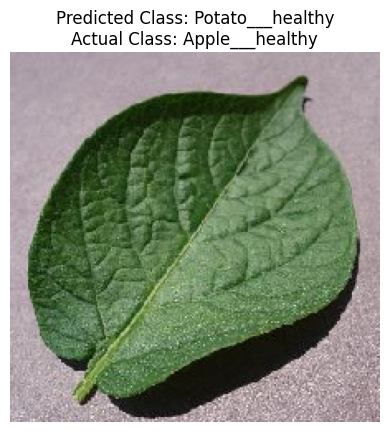

In [14]:
prediction = tf.argmax(vgg16_model.predict(img_array, verbose=0)[0]).numpy()

plt.imshow(img2)
plt.axis('off')

plt.title(f'Predicted Class: {class_names[prediction]}\nActual Class: {class_names[class_to_test]}')

Text(0.5, 1.0, 'Predicted Class: Potato___healthy\nActual Class: Apple___healthy')

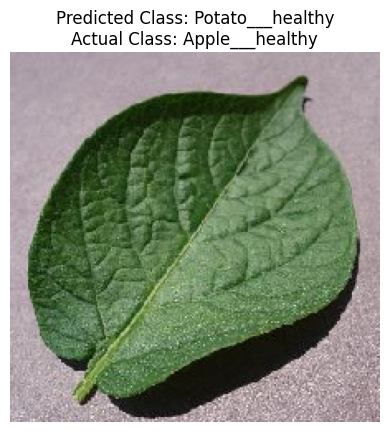

In [15]:
prediction = tf.argmax(vgg19_model.predict(img_array, verbose=0)[0]).numpy()

plt.imshow(img2)
plt.axis('off')

plt.title(f'Predicted Class: {class_names[prediction]}\nActual Class: {class_names[class_to_test]}')